In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# ls

### Random Sampling for Numerical Data

In [3]:
df = pd.read_csv('train-2.csv')

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_needed = df[['Survived','Age','Fare']]

In [7]:
df_needed.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df_needed.dtypes

Survived      int64
Age         float64
Fare        float64
dtype: object

In [9]:
# print()

In [10]:
x = df_needed.drop(columns=['Survived'])
y = df['Survived']


In [11]:
# x
# y

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [13]:
X_train.tail()

,Age,Fare
165,9.0,20.5250
689,15.0,211.3375
392,28.0,7.9250
371,18.0,6.4958
296,23.5,7.2292


In [14]:
X_train.isnull().sum()

Age     140
Fare      0
dtype: int64

In [15]:
# X_train.dtypes

In [16]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

### Replacing the missing data with the random sample data

#### X_train missing data replacing with random Sample data

In [17]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

196   NaN
457   NaN
413   NaN
428   NaN
324   NaN
       ..
77    NaN
101   NaN
863   NaN
270   NaN
451   NaN
Name: Age_imputed, Length: 140, dtype: float64

In [18]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [19]:
X_train['Age_imputed'].isnull().sum()

0

#### X_test missing data replacing with random sample data

In [20]:
X_test['Age_imputed'].isnull().sum()

37

In [21]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [22]:
X_test['Age_imputed'].isnull().sum()

0

In [23]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

In [24]:
X_test.isnull().sum()

Age            37
Fare            0
Age_imputed     0
dtype: int64

In [25]:
X_train.shape

(712, 3)

In [26]:
X_test.shape

(179, 3)

In [27]:
type(X_train['Age'])

pandas.core.series.Series

In [28]:
# X_train['Age'].values

#### To convert the Pandas Series into numpy array: we need to use .values

In [29]:
# X_train.loc[ X_train['Age'] == 'NaN', 'Age']

In [30]:
# X_train.loc[X_train['Age']==30.0]

### Now visualizing the Age data vs age_imputed data

In [31]:
X_train.columns

Index(['Age', 'Fare', 'Age_imputed'], dtype='object')

<Axes: ylabel='Density'>

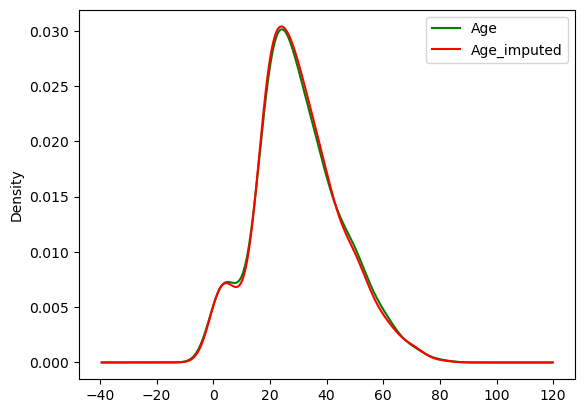

In [32]:
X_train['Age'].plot(kind='kde', color='Green', legend=True)
X_train['Age_imputed'].plot(kind='kde', color='Red', legend=True)


<Axes: >

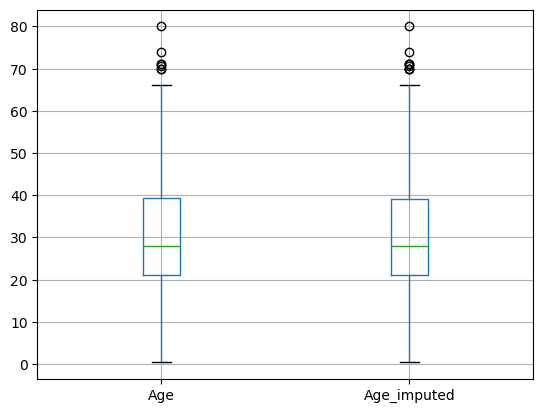

In [33]:
X_train[['Age', 'Age_imputed']].boxplot()

#### We can see the distribution is remaining as it is after doing random sampling. The Outlier is also pretty much same before & after the random sampling

In [34]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

ValueError: cannot set using a list-like indexer with a different length than the value

#### To Handle the production & to make sure that a particular input should have only one particular output, we have to make sure the input is consistent for a particular input value.

In [ ]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

### Random Sampling for Categorical Data

In [ ]:
house_df = pd.read_csv('house-train.csv')

In [ ]:
house_df.columns

In [ ]:
house_needed_df = house_df[['FireplaceQu', 'GarageQual', 'SalePrice']]
house_needed_df.sample(10)

In [ ]:
house_needed_df.dtypes

In [ ]:
# house_needed_df.loc[house_needed_df['FireplaceQu']=='TA']

In [ ]:
house_needed_df.isnull().sum()

In [ ]:
print("Missing in Percentage")
house_needed_df.isnull().mean()*100

#### Train Test Split

In [ ]:
X = house_needed_df
y = house_needed_df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# X_test

#### Now to understand better & compare the data we will add a new column to the existing dataframe.

In [ ]:
X_train['Imputed_FireplaceQu'] = X_train['FireplaceQu']
X_train['Imputed_GarageQual'] = X_train['GarageQual']

X_test['Imputed_FireplaceQu'] = X_test['FireplaceQu']
X_test['Imputed_GarageQual'] = X_test['GarageQual']

In [ ]:
X_train.head()

In [ ]:
X_test.head()

#### Random sample imputing for NaN values

In [ ]:
print(X_train['Imputed_FireplaceQu'].isnull().sum())
print(X_train['Imputed_GarageQual'].isnull().sum())

In [ ]:
X_train['Imputed_FireplaceQu'][X_train['Imputed_FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['Imputed_FireplaceQu'].isnull().sum()).values

In [ ]:
X_train['Imputed_FireplaceQu'].isnull().sum()

In [ ]:
X_train['Imputed_GarageQual'][X_train['Imputed_GarageQual'].isnull()] = (X_train['GarageQual'].dropna().sample(X_train['Imputed_GarageQual'].isnull().sum()).values)

In [ ]:
X_train['Imputed_GarageQual'].isnull().sum()

In [ ]:
columns = ['Imputed_FireplaceQu', 'Imputed_GarageQual']

In [ ]:
print(X_test['Imputed_FireplaceQu'].isnull().sum())
print(X_test['Imputed_GarageQual'].isnull().sum())

In [ ]:
for i in columns:
    print(i)
    X_test[i][X_test[i].isnull()] = X_test[i[8:]].dropna().sample(X_test[i].isnull().sum(), replace=True).values

In [ ]:
X_test['Imputed_FireplaceQu'].isnull().sum()

In [ ]:
X_test['Imputed_GarageQual'].isnull().sum()

#### Visualizing the test data columns before & after Imputation

In [ ]:
X_test['FireplaceQu'].isnull().mean()*100

In [ ]:
X_test['Imputed_FireplaceQu'].value_counts().plot(kind='bar', color='Green', legend=True)
X_test['FireplaceQu'].value_counts().plot(kind='bar', color='Red', legend=True)

In [ ]:
X_test['Imputed_GarageQual'].value_counts().plot(kind='bar', color='Green', legend=True)
X_test['GarageQual'].value_counts().plot(kind='bar', color='Red', legend=True)

In [ ]:
X_test['Imputed_GarageQual'].value_counts()

In [ ]:
X_test['GarageQual'].value_counts()

#### Visualizing the train data columns before & after Imputation

In [ ]:
X_train['FireplaceQu'].isnull().mean()*100

In [ ]:
X_train['Imputed_FireplaceQu'].value_counts().plot(kind='bar', color='Green', legend=True)
X_train['FireplaceQu'].value_counts().plot(kind='bar', color='Red', legend=True)

In [ ]:
print(X_train['FireplaceQu'].value_counts())
print(X_train['Imputed_FireplaceQu'].value_counts())

In [ ]:
X_train['GarageQual'].isnull().mean()*100

In [ ]:
X_train['Imputed_GarageQual'].value_counts().plot(kind='bar', color='green', legend=True)
X_train['GarageQual'].value_counts().plot(kind='bar',color='Red',legend=True)

In [ ]:
X_train['Imputed_GarageQual'].value_counts()

In [ ]:
frequency_of_each_value = []
for i in X_train['Imputed_GarageQual'].value_counts():
    frequency_of_each_value.append(i)

In [ ]:
X_train['Imputed_GarageQual'].value_counts()['TA']

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# index = np.arange(len(X_train['Imputed_GarageQual'].value_counts()))
# ax.bar(index, frequency_of_each_value, color='pink')

In [ ]:
fig = plt.figure(figsize=(12,8))

##Plot1
ax1 = plt.subplot(2,2,1)
frequency_of_each_value_1 = []
for i in X_train['GarageQual'].value_counts():
    frequency_of_each_value_1.append(i)

index = np.arange(len(X_train['GarageQual'].value_counts()))
ax1.bar(index, frequency_of_each_value_1, color='blue')
ax1.set(title='X_train[GarageQual]')

##plot2
ax2 = plt.subplot(2,2,2)
frequency_of_each_value_2 = []
for i in X_train['Imputed_GarageQual'].value_counts():
    frequency_of_each_value_2.append(i)

index = np.arange(len(X_train['Imputed_GarageQual'].value_counts()))
ax2.bar(index, frequency_of_each_value_2, color='indigo')
ax2.set(title='X_train[Imputed_GarageQual]')


##Plot3
ax3 = plt.subplot(2,2,3)
frequency_of_each_value_3 = []
for i in X_train['FireplaceQu'].value_counts():
    frequency_of_each_value_3.append(i)

index = np.arange(len(X_test['FireplaceQu'].value_counts()))
ax3.bar(index, frequency_of_each_value_3, color='green')
ax3.set(title='X_train[FireplaceQu]')

##plot4
ax4 = plt.subplot(2,2,4)
frequency_of_each_value_4 = []
for i in X_train['Imputed_FireplaceQu'].value_counts():
    frequency_of_each_value_4.append(i)

index = np.arange(len(X_test['Imputed_FireplaceQu'].value_counts()))
ax4.bar(index, frequency_of_each_value_4, color='violet')
ax4.set(title='X_train[Imputed_FireplaceQu]')